# Embedded Method With SMOTE-ENN

## Import Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split , GridSearchCV , KFold
from sklearn.linear_model import Lasso, LassoCV
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, make_scorer, confusion_matrix, log_loss
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier

## Import Data

In [2]:
# Import  the SPSS data file
df=pd.read_spss("E:\Data Analysis\BDHS_2017-2018.sav")
# Displaying the first 5 rows of the DataFrame
df.head()

,V013,V024,V025,V106,V701,V130,V151,V201,V123,V124,...,V190,V190A,V113,V116,V161,V213,V404,V743A,V312,BMI2
0,15-19,Rajshahi,Rural,Secondary,No education,Islam,Male,No child,No,No,...,Poorest,Poorest,Improved,Improved,Solid fuel,No or unsure,No,Respondent and husband/partner,Modern methods,Underweight/Normal
1,45-49,Rangpur,Urban,Primary,No education,Islam,Male,More than two child,No,No,...,Poorest,Poorest,Improved,Improved,Solid fuel,No or unsure,No,Respondent and husband/partner,Traditional methods,Underweight/Normal
2,15-19,Khulna,Rural,Secondary,Primary,Islam,Male,One child,No,No,...,Poorer,Poorer,Improved,Improved,Solid fuel,No or unsure,Yes,Respondent and husband/partner,Modern methods,Underweight/Normal
3,40-44,Barisal,Urban,Primary,Primary,Islam,Male,More than two child,No,No,...,Poorest,Poorest,Improved,Improved,Solid fuel,No or unsure,No,Respondent and husband/partner,Not using,Underweight/Normal
4,25-29,Barisal,Rural,Secondary,Higher,Islam,Male,One child,No,No,...,Richer,Richest,Improved,Improved,Solid fuel,Yes,No,Respondent and husband/partner,Not using,Underweight/Normal


## Get some Basic Information

In [3]:
# Displaying a summary of the DataFrame, including the number of non-null entries and data types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16303 entries, 0 to 16302
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   V013    16303 non-null  category
 1   V024    16303 non-null  category
 2   V025    16303 non-null  category
 3   V106    16303 non-null  category
 4   V701    16303 non-null  category
 5   V130    16303 non-null  category
 6   V151    16303 non-null  category
 7   V201    16303 non-null  category
 8   V123    16303 non-null  category
 9   V124    16303 non-null  category
 10  V125    16303 non-null  category
 11  V119    16303 non-null  category
 12  V122    16303 non-null  category
 13  V121    16303 non-null  category
 14  V159    16303 non-null  category
 15  V716    16303 non-null  category
 16  V704    16303 non-null  category
 17  V190    16303 non-null  category
 18  V190A   16303 non-null  category
 19  V113    16303 non-null  category
 20  V116    16303 non-null  category
 21  V161    1630

In [4]:
# Checking missing values
df.isnull().sum().sum()

0

In [5]:
# Checking the dimensions of the DataFrame
df.shape

(16303, 27)

In [6]:
# Displaying the column labels (names) of the DataFrame
df.columns

Index(['V013', 'V024', 'V025', 'V106', 'V701', 'V130', 'V151', 'V201', 'V123',
       'V124', 'V125', 'V119', 'V122', 'V121', 'V159', 'V716', 'V704', 'V190',
       'V190A', 'V113', 'V116', 'V161', 'V213', 'V404', 'V743A', 'V312',
       'BMI2'],
      dtype='object')

In [7]:
# Counting the frequency of each unique value in the 'BMI2' column
df.BMI2.value_counts()

BMI2
Underweight/Normal    10951
Overweight/Obese       5352
Name: count, dtype: int64

## Feature Transformation

In [8]:
# Transform the selected features
V013 = {'15-19': 1, '20-24': 2,'25-29':3,'30-34':4,'35-39':5,'40-44':6,'45-49':7}
df['V013'] = df['V013'].map(V013)
V024 = {'Barisal': 1, 'Chittagong': 2,'Dhaka':3,'Khulna':4,'Mymensingh':5,'Rajshahi':6,'Rangpur':7,'Sylhet':8}
df['V024'] = df['V024'].map(V024)
V025 = {'Urban': 1, 'Rural': 2}
df['V025'] = df['V025'].map(V025)
V106 = {'No education': 0, 'Primary': 1,'Secondary':2,'Higher':3}
df['V106'] = df['V106'].map(V106)
V701= {'No education': 0, 'Primary': 1,'Secondary':2,'Higher':3,"Don't know":4}
df['V701'] = df['V701'].map(V701)
V130 = {'Islam': 0, 'Hinduism': 1,'Buddhism':2,'Christianity':3}
df['V130'] = df['V130'].map(V130)
V151= {'Male': 1, 'Female': 2}
df['V151'] = df['V151'].map(V151)
V201= {'No child': 0, 'One child': 1,'Two child':2,'More than two child':3}
df['V201'] = df['V201'].map(V201)
V123= {'No': 0, 'Yes': 1}
df['V123'] = df['V123'].map(V123)
V124= {'No': 0, 'Yes': 1}
df['V124'] = df['V124'].map(V124)
V125= {'No': 0, 'Yes': 1}
df['V125'] = df['V125'].map(V125)
V119= {'No': 0, 'Yes': 1}
df['V119'] = df['V119'].map(V119)
V122= {'No': 0, 'Yes': 1}
df['V122'] = df['V122'].map(V122)
V121= {'No': 0, 'Yes': 1}
df['V121'] = df['V121'].map(V121)
V159= {'Not at all': 0, 'Less than once a week': 1,'At least once a week':2,'Almost every day':3}
df['V159'] = df['V159'].map(V159)
V716= {'Unemployed': 0, 'Agriculture': 1,'Business':2,'Labor/ Service':3,'Job':4}
df['V716'] = df['V716'].map(V716)
V704= {'Unemployed': 0, 'Agriculture': 1,'Business':2,'Labor/ Service':3,'Job':4}
df['V704'] = df['V704'].map(V704)
V190= {'Poorest': 1, 'Poorer': 2,'Middle':3,'Richer':4,'Richest':5}
df['V190'] = df['V190'].map(V190)
V190A= {'Poorest': 1, 'Poorer': 2,'Middle':3,'Richer':4,'Richest':5}
df['V190A'] = df['V190A'].map(V190A)
V113= {'Improved': 1, 'Unimproved': 2}
df['V113'] = df['V113'].map(V113)
V116= {'Improved': 1, 'Unimproved': 2}
df['V116'] = df['V116'].map(V116)
V161= {'Solid fuel': 0, 'Clean fuel': 1}
df['V161'] = df['V161'].map(V161)
V213= {'No or unsure': 0, 'Yes': 1}
df['V213'] = df['V213'].map(V213)
V404= {'No': 0, 'Yes': 1}
df['V404'] = df['V404'].map(V404)
V743A= {'Respondent alone': 1, 'Respondent and husband/partner': 2, "Respondent and other's person": 3}
df['V743A'] = df['V743A'].map(V743A)
V312= {'Not using': 0, 'Modern methods': 1,'Traditional methods':2}
df['V312'] = df['V312'].map(V312)
BMI2= {'Underweight/Normal': 0, 'Overweight/Obese': 1}
df['BMI2'] = df['BMI2'].map(BMI2)

In [9]:
# Displaying the first 5 rows of the DataFrame after transformation
df.head()

,V013,V024,V025,V106,V701,V130,V151,V201,V123,V124,...,V190,V190A,V113,V116,V161,V213,V404,V743A,V312,BMI2
0,1,6,2,2,0,0,1,0,0,0,...,1,1,1,1,0,0,0,2,1,0
1,7,7,1,1,0,0,1,3,0,0,...,1,1,1,1,0,0,0,2,2,0
2,1,4,2,2,1,0,1,1,0,0,...,2,2,1,1,0,0,1,2,1,0
3,6,1,1,1,1,0,1,3,0,0,...,1,1,1,1,0,0,0,2,0,0
4,3,1,2,2,3,0,1,1,0,0,...,4,5,1,1,0,1,0,2,0,0


In [10]:
# Checking missing values after transformation
df.isnull().sum().sum()

0

## Define Explanatory and Outcome Variable

In [11]:
# Drop the Outcome variable from the DataFrame in order to create explanatory variavle
x=df.drop(["BMI2"],axis=1)
y=df["BMI2"]

In [12]:
# Checking the dimensions of the explanatory and outcome variable
x.shape, y.shape

((16303, 26), (16303,))

## Explanatory Data Analysis (EDA)

### BMI2 Graph

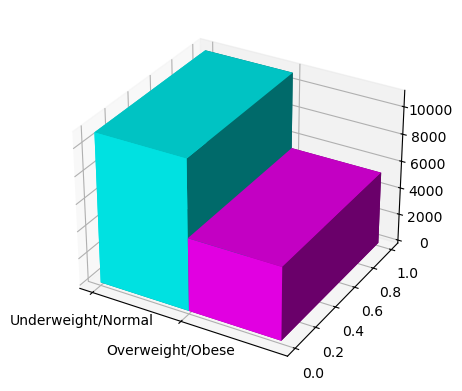

In [13]:
# Calculate the counts for each category in y
counts = np.bincount(y)

# Set up the figure and 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the X, Y, and Z coordinates for the bars
X = np.arange(len(counts))  # [0, 1] for two categories
Y = np.zeros_like(X)  # Y values are all zeros, used just for plotting
Z = np.zeros_like(X)  # Z values are the base of the bars, all zeros

# Define the width, depth, and height of the bars
dx = np.ones_like(X)
dy = np.ones_like(Y)
dz = counts

# Create the bars
ax.bar3d(X, Y, Z, dx, dy, dz, color=['cyan', 'magenta'], zsort='average')

# Set labels and title
ax.set_xticks(X)
ax.set_xticklabels(BMI2)
# Set labels and title with Times New Roman font style
font = {'fontname': 'Times New Roman'}
# Show the plot
plt.show()

### Correlation

In [14]:
# Calculating and displaying the correlation matrix, showing the correlation coefficients between the features of the DataFrame
corr=df.corr()
corr

,V013,V024,V025,V106,V701,V130,V151,V201,V123,V124,...,V190,V190A,V113,V116,V161,V213,V404,V743A,V312,BMI2
V013,1.000000,0.012270,0.000005,-0.372709,-0.180281,0.041279,-0.016666,0.628503,0.057086,-0.008857,...,0.033628,0.050007,-0.005947,-0.015388,-0.014718,-0.205750,-0.376753,-0.153510,0.075661,0.164128
V024,0.012270,1.000000,0.072954,-0.084455,-0.084267,0.055474,-0.079159,0.015849,0.147911,0.066598,...,-0.101378,-0.075478,0.003749,0.037304,-0.104859,0.007359,0.027689,0.038750,0.021058,-0.088859
V025,0.000005,0.072954,1.000000,-0.150652,-0.178218,0.002744,0.042323,0.085681,0.112747,-0.055957,...,-0.426624,0.031221,0.063251,0.135389,-0.488728,0.001918,0.027265,0.028443,-0.051644,-0.159486
V106,-0.372709,-0.084455,-0.150652,1.000000,0.624033,0.037122,0.034919,-0.406391,0.043280,0.225866,...,0.405645,0.391025,-0.019958,-0.241745,0.229329,0.084036,0.134791,0.046227,-0.023164,0.114590
V701,-0.180281,-0.084267,-0.178218,0.624033,1.000000,0.057236,0.045746,-0.290724,0.041009,0.256817,...,0.472606,0.455129,-0.019901,-0.281662,0.272436,0.034932,0.057019,0.035624,-0.022194,0.160627
V130,0.041279,0.055474,0.002744,0.037122,0.057236,1.000000,-0.053993,-0.042693,0.024064,0.009224,...,-0.018309,-0.012792,0.022688,-0.001122,-0.003387,-0.014777,-0.014139,0.026270,0.047909,-0.001419
V151,-0.016666,-0.079159,0.042323,0.034919,0.045746,-0.053993,1.000000,0.004826,-0.091827,-0.066338,...,0.048400,0.068024,-0.001981,-0.018295,-0.003931,-0.013122,-0.008311,-0.177119,-0.206784,0.017575
V201,0.628503,0.015849,0.085681,-0.406391,-0.290724,-0.042693,0.004826,1.000000,0.021947,-0.083450,...,-0.147240,-0.113775,0.005818,0.090481,-0.106746,-0.227950,-0.044287,-0.135992,0.201682,0.063840
V123,0.057086,0.147911,0.112747,0.043280,0.041009,0.024064,-0.091827,0.021947,1.000000,0.068383,...,0.017298,0.078099,-0.011324,-0.050438,-0.151448,-0.014816,-0.047293,0.044226,0.041050,0.000699
V124,-0.008857,0.066598,-0.055957,0.225866,0.256817,0.009224,-0.066338,-0.083450,0.068383,1.000000,...,0.303283,0.307286,-0.014719,-0.149957,0.093582,0.015073,-0.002484,0.037984,0.016878,0.115980


In [15]:
#correlation heatmap
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,V013,V024,V025,V106,V701,V130,V151,V201,V123,V124,V125,V119,V122,V121,V159,V716,V704,V190,V190A,V113,V116,V161,V213,V404,V743A,V312,BMI2
V013,1.00,0.01,0.00,-0.37,-0.18,0.04,-0.02,0.63,0.06,-0.01,0.01,0.02,0.03,0.02,-0.04,0.07,-0.21,0.03,0.05,-0.01,-0.02,-0.01,-0.21,-0.38,-0.15,0.08,0.16
V024,0.01,1.00,0.07,-0.08,-0.08,0.06,-0.08,0.02,0.15,0.07,0.00,0.01,-0.11,-0.04,-0.04,0.02,-0.09,-0.10,-0.08,0.00,0.04,-0.10,0.01,0.03,0.04,0.02,-0.09
V025,0.00,0.07,1.00,-0.15,-0.18,0.00,0.04,0.09,0.11,-0.06,-0.07,-0.22,-0.28,-0.30,-0.28,-0.08,-0.23,-0.43,0.03,0.06,0.14,-0.49,0.00,0.03,0.03,-0.05,-0.16
V106,-0.37,-0.08,-0.15,1.00,0.62,0.04,0.03,-0.41,0.04,0.23,0.07,0.18,0.36,0.26,0.27,-0.01,0.26,0.41,0.39,-0.02,-0.24,0.23,0.08,0.13,0.05,-0.02,0.11
V701,-0.18,-0.08,-0.18,0.62,1.00,0.06,0.05,-0.29,0.04,0.26,0.07,0.19,0.41,0.29,0.26,-0.04,0.28,0.47,0.46,-0.02,-0.28,0.27,0.03,0.06,0.04,-0.02,0.16
V130,0.04,0.06,0.00,0.04,0.06,1.00,-0.05,-0.04,0.02,0.01,-0.01,-0.07,-0.06,0.03,0.04,0.05,-0.01,-0.02,-0.01,0.02,-0.00,-0.00,-0.01,-0.01,0.03,0.05,-0.00
V151,-0.02,-0.08,0.04,0.03,0.05,-0.05,1.00,0.00,-0.09,-0.07,-0.01,0.02,0.07,0.01,0.01,-0.04,0.17,0.05,0.07,-0.00,-0.02,-0.00,-0.01,-0.01,-0.18,-0.21,0.02
V201,0.63,0.02,0.09,-0.41,-0.29,-0.04,0.00,1.00,0.02,-0.08,-0.01,-0.06,-0.10,-0.10,-0.14,0.02,-0.20,-0.15,-0.11,0.01,0.09,-0.11,-0.23,-0.04,-0.14,0.20,0.06
V123,0.06,0.15,0.11,0.04,0.04,0.02,-0.09,0.02,1.00,0.07,-0.02,0.03,-0.02,0.04,0.03,0.02,-0.09,0.02,0.08,-0.01,-0.05,-0.15,-0.01,-0.05,0.04,0.04,0.00
V124,-0.01,0.07,-0.06,0.23,0.26,0.01,-0.07,-0.08,0.07,1.00,0.11,0.09,0.27,0.20,0.15,-0.02,0.07,0.30,0.31,-0.01,-0.15,0.09,0.02,-0.00,0.04,0.02,0.12


## Feature Selection: Embedded Method (LASSO)

In [16]:
# Initialize a Lasso model with an alpha value 0.01 regularization strength
lasso_model = Lasso(alpha=0.01) 
lasso_model.fit(x,y)

Lasso(alpha=0.01)

In [17]:
# Retrieve the coefficients of the features from the fitted Lasso model
feature_coefs = lasso_model.coef_
# Create a DataFrame to display the feature names alongside their corresponding Lasso coefficients
coefficients_df = pd.DataFrame({
    'Feature': x.columns,
    'Lasso Coefficient': feature_coefs
})
print(coefficients_df)

   Feature  Lasso Coefficient
0     V013           0.040525
1     V024          -0.010544
2     V025          -0.002007
3     V106           0.015682
4     V701           0.016351
5     V130          -0.000000
6     V151          -0.000000
7     V201           0.001406
8     V123          -0.000000
9     V124           0.000000
10    V125           0.000000
11    V119          -0.000000
12    V122           0.041700
13    V121           0.000000
14    V159           0.012575
15    V716          -0.000000
16    V704           0.007101
17    V190           0.058330
18   V190A           0.000000
19    V113          -0.000000
20    V116          -0.000000
21    V161           0.000250
22    V213           0.000000
23    V404          -0.029117
24   V743A          -0.000000
25    V312           0.000000


In [18]:
# Identify the features that have non-zero coefficients in the Lasso model
important_features = x.columns[feature_coefs != 0]
# Display the important features
important_features

Index(['V013', 'V024', 'V025', 'V106', 'V701', 'V201', 'V122', 'V159', 'V704',
       'V190', 'V161', 'V404'],
      dtype='object')

In [19]:
# Create a new DataFrame containing only the important features
x_selected = x[important_features]

## Dataset Balancing (SMOTE-ENN)

In [20]:
# Applying SMOTE-ENN to handle class imbalance to the selected features
smote_enn = SMOTEENN(sampling_strategy="auto", random_state=42)
x_resampled, y_resampled = smote_enn.fit_resample(x_selected, y)
# Checking the dimensions of the explanatory and outcome variable after resampling
x_resampled.shape , y_resampled.shape

((9136, 12), (9136,))

In [21]:
# Counting the frequency of each unique value in the 'BMI2' column after resampling
y_resampled.value_counts()

BMI2
1    4621
0    4515
Name: count, dtype: int64

## Train-Test Spliting

In [22]:
# Spliting the data set into training and testing subsets
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, random_state=42, stratify=y_resampled, test_size=.2)

In [23]:
# Checking the dimensions of the training and testing subsets
x_train.shape, x_test.shape

((7308, 12), (1828, 12))

In [24]:
# Checking the dimensions of the training and testing subsets
y_train.shape, y_test.shape

((7308,), (1828,))

In [25]:
x_train.head()

,V013,V024,V025,V106,V701,V201,V122,V159,V704,V190,V161,V404
2668,1,1,1,1,1,1,0,0,3,1,0,1
8364,3,2,1,1,1,1,0,0,3,4,1,0
8870,2,3,1,2,2,0,1,2,1,4,0,0
1698,5,7,2,1,1,2,0,1,1,2,0,0
2805,2,8,2,1,2,3,0,0,3,1,0,1


In [26]:
y_train.head()

2668    0
8364    1
8870    1
1698    0
2805    0
Name: BMI2, dtype: category
Categories (2, int64): [1, 0]

## (Default) Classification Algorithm in Machine Learning

### 1. Support Vector Machine (SVM)

In [27]:
# Initialize the SVM model
model_svm=SVC()
model_svm.fit(x_train, y_train) 
y_pred = model_svm.predict(x_test) 
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       903
           1       0.83      0.82      0.82       925

    accuracy                           0.82      1828
   macro avg       0.82      0.82      0.82      1828
weighted avg       0.82      0.82      0.82      1828



In [28]:
# Printing the default parameters
print(model_svm.get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


<Axes: >

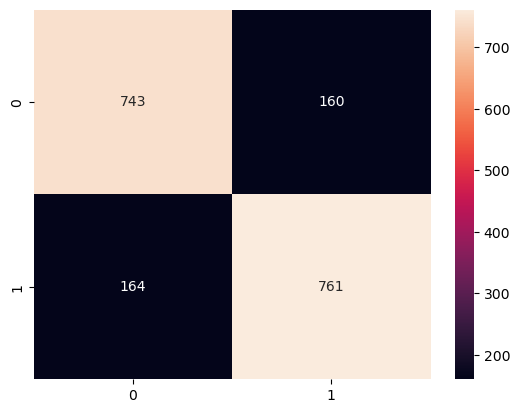

In [29]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix,annot=True,fmt="d")

In [30]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [31]:
# Printing the performance evaluation
accuracy_svm= accuracy_score(y_test, y_pred)
precision_svm = precision_score(y_test, y_pred)
recall_svm = recall_score(y_test, y_pred)
f1_svm = f1_score(y_test, y_pred)
kappa_svm = cohen_kappa_score(y_test, y_pred)
specificity_svm = specificity_score(y_test, y_pred)
log_loss_svm = log_loss(y_test, y_pred)
roc_auc_score_svm = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)
print("Kappa:",kappa_svm)
print("Specificity:", specificity_svm)
print("AUC:", roc_auc_score_svm)
print("Log Loss:", log_loss_svm) 

Accuracy: 0.8227571115973742
Precision: 0.8262757871878393
Recall: 0.8227027027027027
F1 Score: 0.8244853737811484
Kappa: 0.645481546570831
Specificity: 0.82281284606866
AUC: 0.8227577743856813
Log Loss: 6.388481235270217


### 2. Logistic Regression (LR)

In [32]:
# Initialize the SVM model
model_lr=LogisticRegression()
model_lr.fit(x_train, y_train) 
y_pred = model_lr.predict(x_test) 
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       903
           1       0.81      0.79      0.80       925

    accuracy                           0.80      1828
   macro avg       0.80      0.80      0.80      1828
weighted avg       0.80      0.80      0.80      1828



In [33]:
# Printing the default parameters
print(model_lr.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


<Axes: >

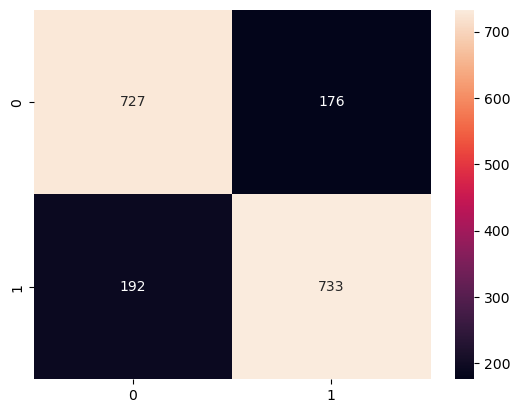

In [34]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix,annot=True,fmt="d")

In [35]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [36]:
# Printing the performance evaluation
accuracy_lr= accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred)
kappa_lr = cohen_kappa_score(y_test, y_pred)
specificity_lr = specificity_score(y_test, y_pred)
log_loss_lr = log_loss(y_test, y_pred)
roc_auc_score_lr = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)
print("Kappa:", kappa_lr)
print("Specificity:", specificity_lr)
print("AUC:", roc_auc_score_lr)
print("Log Loss:", log_loss_lr) 

Accuracy: 0.7986870897155361
Precision: 0.8063806380638063
Recall: 0.7924324324324324
F1 Score: 0.7993456924754635
Kappa: 0.5974006853783167
Specificity: 0.805094130675526
AUC: 0.7987632815539792
Log Loss: 7.256052761047655


### 3. Random Forest (RF)

In [37]:
# Initialize the SVM model
model_rf=RandomForestClassifier()
model_rf.fit(x_train, y_train) 
y_pred = model_rf.predict(x_test) 
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       903
           1       0.93      0.96      0.94       925

    accuracy                           0.94      1828
   macro avg       0.94      0.94      0.94      1828
weighted avg       0.94      0.94      0.94      1828



In [38]:
# Printing the default parameters
print(model_rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


<Axes: >

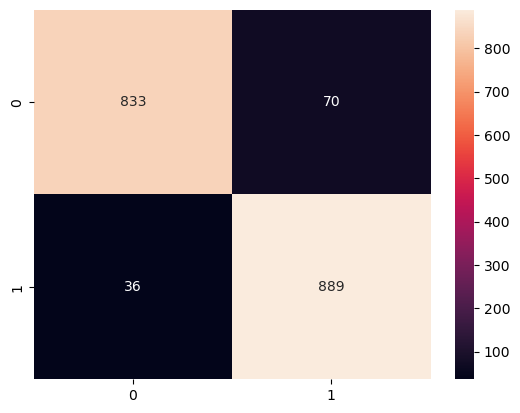

In [39]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix,annot=True,fmt="d")

In [40]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [41]:
# Printing the performance evaluation
accuracy_rf= accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)
kappa_rf = cohen_kappa_score(y_test, y_pred)
specificity_rf = specificity_score(y_test, y_pred)
log_loss_rf = log_loss(y_test, y_pred)
roc_auc_score_rf = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("Kappa:", kappa_rf)
print("Specificity:", specificity_rf)
print("AUC:", roc_auc_score_rf)
print("Log Loss:", log_loss_rf) 

Accuracy: 0.9420131291028446
Precision: 0.927007299270073
Recall: 0.961081081081081
F1 Score: 0.9437367303609342
Kappa: 0.8839574991525941
Specificity: 0.9224806201550387
AUC: 0.9417808506180599
Log Loss: 2.090058675736553


### 4. K-Nearest Neighbor (KNN)

In [42]:
# Initialize the KNN model
model_knn=KNeighborsClassifier()
model_knn.fit(x_train, y_train) 
y_pred = model_knn.predict(x_test) 
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       903
           1       0.90      0.94      0.92       925

    accuracy                           0.91      1828
   macro avg       0.91      0.91      0.91      1828
weighted avg       0.91      0.91      0.91      1828



In [43]:
# Printing the default parameters
print(model_knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


<Axes: >

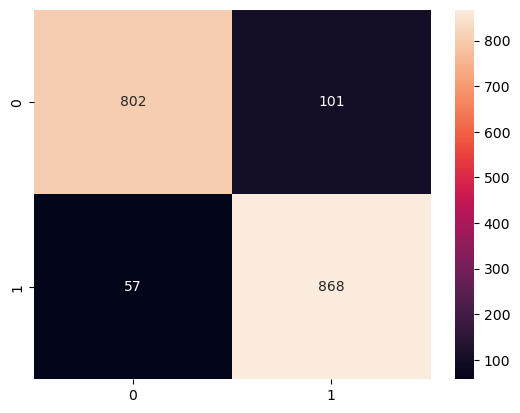

In [44]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix,annot=True,fmt="d")

In [45]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [46]:
# Printing the performance evaluation
accuracy_knn= accuracy_score(y_test, y_pred)
precision_knn = precision_score(y_test, y_pred)
recall_knn = recall_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)
kappa_knn = cohen_kappa_score(y_test, y_pred)
specificity_knn = specificity_score(y_test, y_pred)
log_loss_knn = log_loss(y_test, y_pred)
roc_auc_score_knn = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)
print("Kappa:", kappa_knn)
print("Specificity:", specificity_knn)
print("AUC:", roc_auc_score_knn)
print("Log Loss:", log_loss_knn) 

Accuracy: 0.9135667396061269
Precision: 0.8957688338493293
Recall: 0.9383783783783783
F1 Score: 0.9165786694825766
Kappa: 0.8270081972613504
Specificity: 0.8881506090808416
AUC: 0.91326449372961
Log Loss: 3.115370478928069


### 5. Extreme Gradient Boosting (XGBoost)

In [47]:
# Initialize the XGBoost model
model_xgb=xgb.XGBClassifier(enable_categorical=True)
model_xgb.fit(x_train, y_train)
y_pred = model_xgb.predict(x_test) 
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       903
           1       0.93      0.95      0.94       925

    accuracy                           0.94      1828
   macro avg       0.94      0.94      0.94      1828
weighted avg       0.94      0.94      0.94      1828



In [48]:
# Printing the default parameters
print(model_xgb.get_params())

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': True, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


<Axes: >

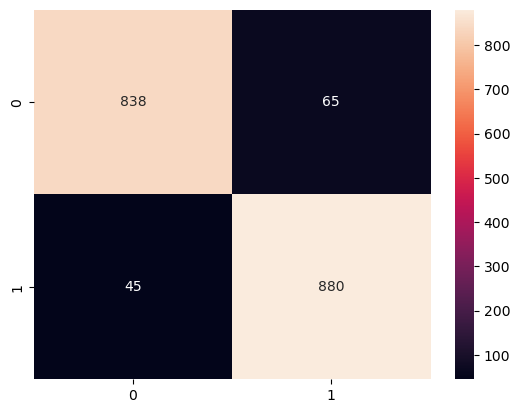

In [49]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix,annot=True,fmt="d")

In [50]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [51]:
# Printing the performance evaluation
accuracy_xgb= accuracy_score(y_test, y_pred)
precision_xgb = precision_score(y_test, y_pred)
recall_xgb = recall_score(y_test, y_pred)
f1_xgb = f1_score(y_test, y_pred)
kappa_xgb = cohen_kappa_score(y_test, y_pred)
specificity_xgb = specificity_score(y_test, y_pred)
log_loss_xgb = log_loss(y_test, y_pred)
roc_auc_score_xgb = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)
print("Kappa:", kappa_xgb)
print("Specificity:", specificity_xgb)
print("AUC:", roc_auc_score_xgb)
print("Log Loss:", log_loss_xgb) 

Accuracy: 0.9398249452954048
Precision: 0.9312169312169312
Recall: 0.9513513513513514
F1 Score: 0.9411764705882353
Kappa: 0.879600744861117
Specificity: 0.9280177187153932
AUC: 0.9396845350333723
Log Loss: 2.1689288144435923


### 6. Categorical Boosting (CatBoost)

In [52]:
# List of categorical feature names to be used in the model
# These features are assumed to be categorical variables in the selected features
cat_features=['V013', 'V024', 'V025', 'V106', 'V701', 'V201', 'V122', 'V159', 'V704', 'V190', 'V161', 'V404']

In [53]:
# Initialize the CatBoost model
model_cb=CatBoostClassifier(cat_features=cat_features)
model_cb.fit(x_train, y_train)
y_pred = model_cb.predict(x_test) 
# Print the classification report
print(classification_report(y_test, y_pred))

Learning rate set to 0.024087
0:	learn: 0.6784027	total: 185ms	remaining: 3m 4s
1:	learn: 0.6649861	total: 227ms	remaining: 1m 53s
2:	learn: 0.6535930	total: 269ms	remaining: 1m 29s
3:	learn: 0.6416965	total: 314ms	remaining: 1m 18s
4:	learn: 0.6289306	total: 344ms	remaining: 1m 8s
5:	learn: 0.6174737	total: 371ms	remaining: 1m 1s
6:	learn: 0.6052384	total: 397ms	remaining: 56.4s
7:	learn: 0.5956595	total: 433ms	remaining: 53.6s
8:	learn: 0.5856642	total: 458ms	remaining: 50.5s
9:	learn: 0.5770431	total: 486ms	remaining: 48.1s
10:	learn: 0.5661288	total: 517ms	remaining: 46.5s
11:	learn: 0.5561928	total: 541ms	remaining: 44.6s
12:	learn: 0.5479601	total: 563ms	remaining: 42.7s
13:	learn: 0.5401272	total: 589ms	remaining: 41.5s
14:	learn: 0.5331989	total: 618ms	remaining: 40.6s
15:	learn: 0.5263136	total: 643ms	remaining: 39.6s
16:	learn: 0.5189698	total: 665ms	remaining: 38.5s
17:	learn: 0.5120580	total: 684ms	remaining: 37.3s
18:	learn: 0.5051093	total: 700ms	remaining: 36.2s
19:	lear

In [54]:
# Printing the default parameters
print(model_cb.get_params())

{'cat_features': ['V013', 'V024', 'V025', 'V106', 'V701', 'V201', 'V122', 'V159', 'V704', 'V190', 'V161', 'V404']}


<Axes: >

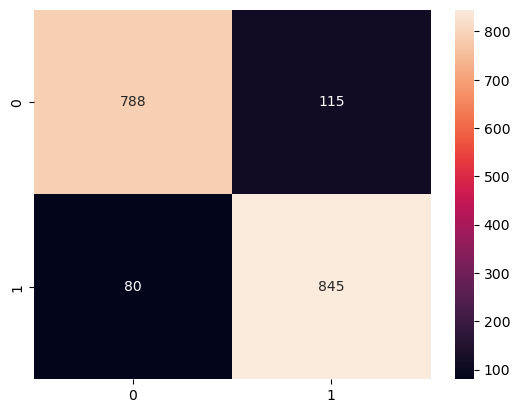

In [55]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix,annot=True,fmt="d")

In [56]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [57]:
# Printing the performance evaluation
accuracy_cb = accuracy_score(y_test, y_pred)
precision_cb = precision_score(y_test, y_pred)
recall_cb = recall_score(y_test, y_pred)
f1_cb = f1_score(y_test, y_pred)
kappa_cb = cohen_kappa_score(y_test, y_pred)
specificity_cb = specificity_score(y_test, y_pred)
log_loss_cb = log_loss(y_test, y_pred)
roc_auc_score_cb = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy_cb)
print("Precision:", precision_cb)
print("Recall:", recall_cb)
print("F1 Score:", f1_cb)
print("Kappa:", kappa_cb)
print("Specificity:", specificity_cb)
print("AUC:", roc_auc_score_cb)
print("Log Loss:", log_loss_cb) 

Accuracy: 0.8933260393873085
Precision: 0.8802083333333334
Recall: 0.9135135135135135
F1 Score: 0.896551724137931
Kappa: 0.7865227754554492
Specificity: 0.8726467331118494
AUC: 0.8930801233126815
Log Loss: 3.8449192619681867


### 7. Multi-Layer Perceptron (MLP)

In [58]:
# Initialize the MLP model
model_mlp=MLPClassifier()
model_mlp.fit(x_train, y_train) 
y_pred = model_mlp.predict(x_test) 
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       903
           1       0.84      0.85      0.85       925

    accuracy                           0.84      1828
   macro avg       0.84      0.84      0.84      1828
weighted avg       0.84      0.84      0.84      1828



In [59]:
# Printing the default parameters
print(model_mlp.get_params())

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


<Axes: >

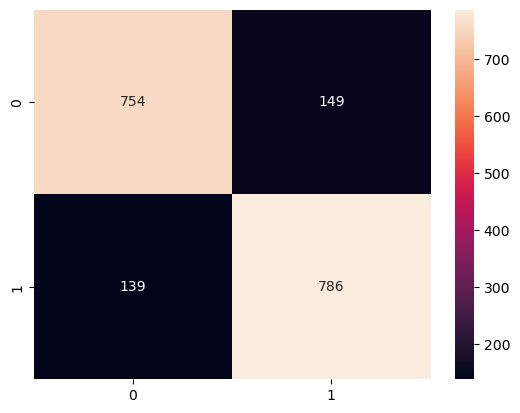

In [60]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix,annot=True,fmt="d")

In [61]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [62]:
# Printing the performance evaluation
accuracy_mlp = accuracy_score(y_test, y_pred)
precision_mlp = precision_score(y_test, y_pred)
recall_mlp = recall_score(y_test, y_pred)
f1_mlp = f1_score(y_test, y_pred)
kappa_mlp = cohen_kappa_score(y_test, y_pred)
specificity_mlp = specificity_score(y_test, y_pred)
log_loss_mlp = log_loss(y_test, y_pred)
roc_auc_score_mlp = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy_mlp)
print("Precision:", precision_mlp)
print("Recall:", recall_mlp)
print("F1 Score:", f1_mlp)
print("Kappa:", kappa_mlp)
print("Specificity:", specificity_mlp)
print("AUC:", roc_auc_score_mlp)
print("Log Loss:", log_loss_mlp) 

Accuracy: 0.8424507658643327
Precision: 0.8406417112299466
Recall: 0.8497297297297297
F1 Score: 0.8451612903225807
Kappa: 0.6848143779971623
Specificity: 0.8349944629014396
AUC: 0.8423620963155847
Log Loss: 5.678649986906859


## Hyperparameter Tuned Classification Algorithm 

### 1. Support Vector Machine (SVM)

In [63]:
# Optimize the parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
			'kernel': ['rbf','linear'],
            } 
model_svm=SVC()
# Set up the GridSearchCV to find the best combination of parameters
grid_search_svm= GridSearchCV(estimator=model_svm, param_grid=param_grid,refit = True, cv=5, n_jobs=-1, verbose=3) 
grid_search_svm.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [64]:
# Printing the  parameters
print(grid_search_svm.best_params_) 
print(grid_search_svm.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, gamma=1)


In [65]:
# Print the classification report
y_pred_svm = grid_search_svm.predict(x_test) 
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       903
           1       0.97      0.94      0.96       925

    accuracy                           0.96      1828
   macro avg       0.96      0.96      0.96      1828
weighted avg       0.96      0.96      0.96      1828



<Axes: >

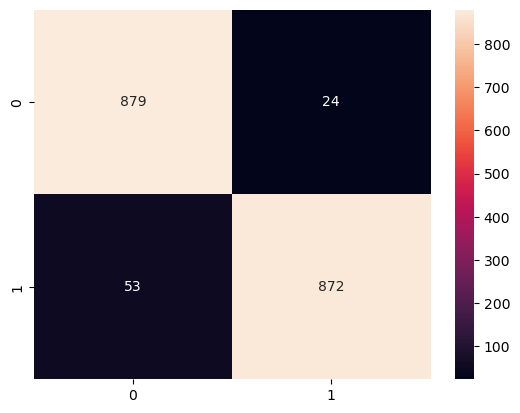

In [66]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(confusion_matrix_svm,annot=True,fmt="d")

In [67]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred_svm):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred_svm)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [68]:
# Printing the performance evaluation
accuracy_svm= accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
kappa_svm = cohen_kappa_score(y_test, y_pred_svm)
specificity_svm = specificity_score(y_test, y_pred_svm)
log_loss_svm = log_loss(y_test, y_pred_svm)
roc_auc_score_svm = roc_auc_score(y_test, y_pred_svm)

print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)
print("Kappa:",kappa_svm)
print("Specificity:", specificity_svm)
print("AUC:", roc_auc_score_svm)
print("Log Loss:", log_loss_svm) 

Accuracy: 0.9578774617067833
Precision: 0.9732142857142857
Recall: 0.9427027027027027
F1 Score: 0.9577155409115871
Kappa: 0.9157748858895588
Specificity: 0.973421926910299
AUC: 0.958062314806501
Log Loss: 1.5182501701105147


In [69]:
# Calculating the False Positive Rate (FPR) and True Positive Rate (TPR) for the ROC curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
# Calculating the Area Under the Curve (AUC) for the ROC curve
auc_svm = roc_auc_score(y_test, y_pred_svm)

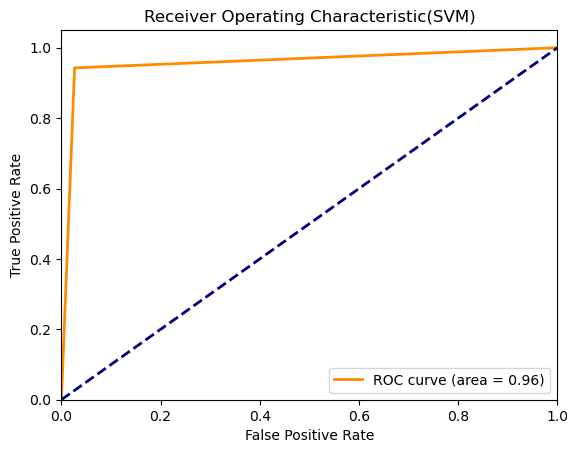

In [70]:
# Plotting the ROC curve with the FPR and TPR values
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (area = {auc_svm:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(SVM)')
plt.legend(loc="lower right")
plt.show()

#### Feature Importance

In [71]:
# Compute permutation importance
perm_importance= permutation_importance(grid_search_svm, x_test, y_test, n_repeats=30, random_state=42)
importance_df = pd.DataFrame(perm_importance.importances_mean, index=x_resampled.columns, columns=["Importance"])
importance_df = importance_df.sort_values(by="Importance", ascending=False)
# Display the results
print(importance_df)

      Importance
V190    0.238877
V013    0.185248
V024    0.174362
V701    0.137673
V159    0.124307
V201    0.098377
V704    0.097174
V106    0.094238
V025    0.027261
V122    0.019967
V404    0.017670
V161    0.010959


### 2. Logistic Regression (LR)

In [72]:
# Optimize the parameter grid for hyperparameter tuning
param_grid={
"penalty" : ["l1","elasticnet"],
"solver" : ["lbfgs","liblinear","sag","saga"],
"max_iter" : [100,300,500,1000],
'C':np.linspace(0,1,30)
}
model_lr = LogisticRegression(random_state= 42)
# Set up the GridSearchCV to find the best combination of parameters
grid_search_lr = GridSearchCV(estimator= model_lr, param_grid= param_grid, cv=5, scoring= 'accuracy', n_jobs=-1, verbose=1)
grid_search_lr.fit(x_train, y_train)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
       0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
       0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
       0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
       0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ]),
                         'max_iter': [100, 300, 500, 1000],
                         'penalty': ['l1', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='accuracy', verbose=1)

In [73]:
# Printing the best parameters and estimators
print(grid_search_lr.best_params_) 
print(grid_search_lr.best_estimator_)

{'C': 0.1724137931034483, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
LogisticRegression(C=0.1724137931034483, penalty='l1', random_state=42,
                   solver='saga')


In [74]:
# Print the classification report
y_pred_lr = grid_search_lr.predict(x_test) 
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       903
           1       0.81      0.79      0.80       925

    accuracy                           0.80      1828
   macro avg       0.80      0.80      0.80      1828
weighted avg       0.80      0.80      0.80      1828



<Axes: >

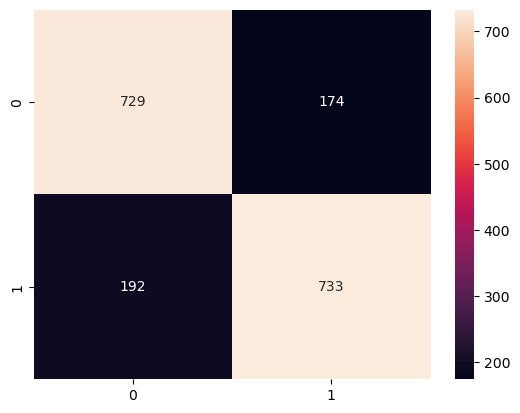

In [75]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(confusion_matrix_lr,annot=True,fmt="d")

In [76]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred_lr):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred_lr)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [77]:
# Printing the performance evaluation
accuracy_lr= accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
kappa_lr = cohen_kappa_score(y_test, y_pred_lr)
specificity_lr = specificity_score(y_test, y_pred_lr)
log_loss_lr = log_loss(y_test, y_pred_lr)
roc_auc_score_lr = roc_auc_score(y_test, y_pred_lr)

print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)
print("Kappa:", kappa_lr)
print("Specificity:", specificity_lr)
print("AUC:", roc_auc_score_lr)
print("Log Loss:", log_loss_lr) 

Accuracy: 0.799781181619256
Precision: 0.8081587651598677
Recall: 0.7924324324324324
F1 Score: 0.8002183406113537
Kappa: 0.5995992689171283
Specificity: 0.8073089700996677
AUC: 0.79987070126605
Log Loss: 7.216617691694135


In [78]:
# Calculating the False Positive Rate (FPR) and True Positive Rate (TPR) for the ROC curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
# Calculating the Area Under the Curve (AUC) for the ROC curve
auc_lr = roc_auc_score(y_test, y_pred_lr)

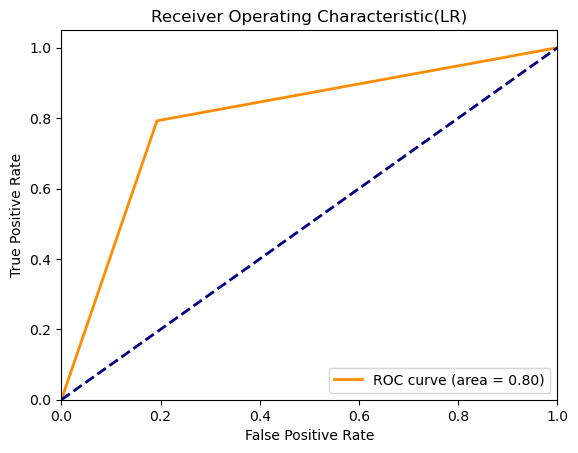

In [79]:
# Plotting the ROC curve with the FPR and TPR values
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_lr:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(LR)')
plt.legend(loc="lower right")
plt.show()

### 3. Random Forest (RF)

In [80]:
# Optimize the parameter grid for hyperparameter tuning
param_grid = { 
	'n_estimators': [25, 50, 100, 150], 
	'max_features': ['sqrt', 'log2'], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],  
    'criterion': ['gini', 'entropy']  
}
model_rf = RandomForestClassifier(random_state=42)
# Set up the GridSearchCV to find the best combination of parameters
grid_search_rf = GridSearchCV(estimator= model_rf, param_grid= param_grid, refit=True, cv=5, verbose=True, n_jobs=-1,scoring='accuracy')
grid_search_rf.fit(x_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [25, 50, 100, 150]},
             scoring='accuracy', verbose=True)

In [81]:
# Printing the best parameters and estimators
print(grid_search_rf.best_params_) 
print(grid_search_rf.best_estimator_)

{'bootstrap': False, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
RandomForestClassifier(bootstrap=False, random_state=42)


In [82]:
# Print the classification report
y_pred_rf = grid_search_rf.predict(x_test) 
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       903
           1       0.94      0.96      0.95       925

    accuracy                           0.95      1828
   macro avg       0.95      0.95      0.95      1828
weighted avg       0.95      0.95      0.95      1828



<Axes: >

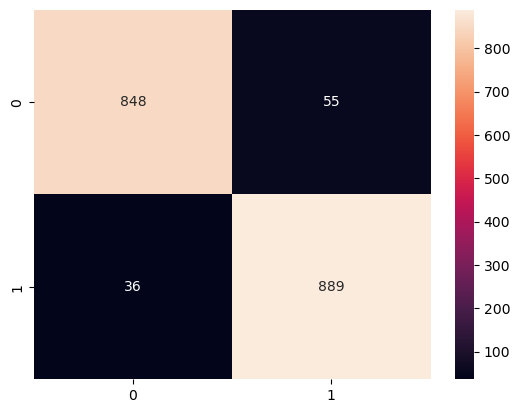

In [83]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(confusion_matrix_rf,annot=True,fmt="d")

In [84]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred_rf):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred_rf)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [85]:
# Printing the performance evaluation
accuracy_rf= accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
kappa_rf = cohen_kappa_score(y_test, y_pred_rf)
specificity_rf = specificity_score(y_test, y_pred_rf)
log_loss_rf = log_loss(y_test, y_pred_rf)
roc_auc_score_rf = roc_auc_score(y_test, y_pred_rf)

print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("Kappa:", kappa_rf)
print("Specificity:", specificity_rf)
print("AUC:", roc_auc_score_rf)
print("Log Loss:", log_loss_rf) 

Accuracy: 0.950218818380744
Precision: 0.9417372881355932
Recall: 0.961081081081081
F1 Score: 0.951310861423221
Kappa: 0.9003982918715407
Specificity: 0.9390919158361019
AUC: 0.9500864984585915
Log Loss: 1.794295655585154


In [86]:
# Calculating the False Positive Rate (FPR) and True Positive Rate (TPR) for the ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
# Calculating the Area Under the Curve (AUC) for the ROC curve
auc_rf = roc_auc_score(y_test, y_pred_rf)

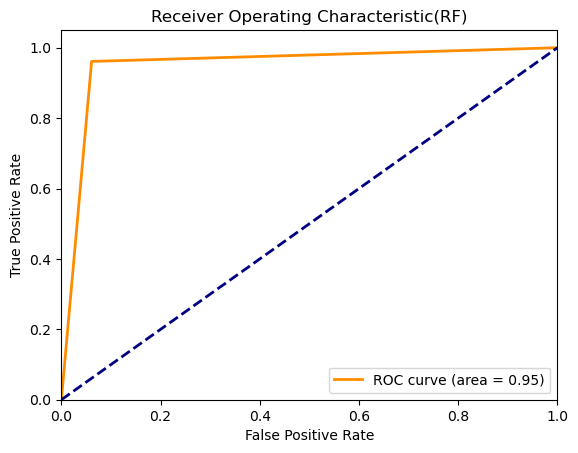

In [87]:
# Plotting the ROC curve with the FPR and TPR values
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {auc_rf:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(RF)')
plt.legend(loc="lower right")
plt.show()

### 4. K-Nearest Neighbor (KNN)

In [88]:
# Optimize the parameter grid for hyperparameter tuning
param_grid = {
    "n_neighbors" : [3,4,5,8,10],
    'metric': ['euclidean', 'manhattan'],
    "weights" : ["uniform","distance"],
    "algorithm" : ["auto","ball_tree","kd_tree","brute"],
    "leaf_size" : [10,20,30,40,50],
}
model_knn = KNeighborsClassifier()
# Set up the GridSearchCV to find the best combination of parameters
grid_search_knn= GridSearchCV(estimator= model_knn, param_grid= param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_knn.fit(x_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 4, 5, 8, 10],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [89]:
# Printing the best parameters and estimators
print(grid_search_knn.best_params_) 
print(grid_search_knn.best_estimator_)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}
KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')


In [90]:
# Print the classification report
y_pred_knn = grid_search_knn.predict(x_test) 
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       903
           1       0.94      0.97      0.95       925

    accuracy                           0.95      1828
   macro avg       0.95      0.95      0.95      1828
weighted avg       0.95      0.95      0.95      1828



<Axes: >

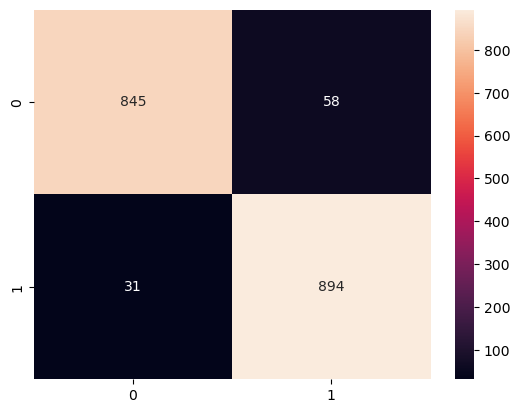

In [91]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(confusion_matrix_knn,annot=True,fmt="d")

In [92]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred_knn):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred_knn)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [93]:
# Printing the performance evaluation
accuracy_knn= accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
kappa_knn = cohen_kappa_score(y_test, y_pred_knn)
specificity_knn = specificity_score(y_test, y_pred_knn)
log_loss_knn = log_loss(y_test, y_pred_knn)
roc_auc_score_knn = roc_auc_score(y_test, y_pred_knn)

print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)
print("Kappa:", kappa_knn)
print("Specificity:", specificity_knn)
print("AUC:", roc_auc_score_knn)
print("Log Loss:", log_loss_knn) 

Accuracy: 0.9513129102844639
Precision: 0.9390756302521008
Recall: 0.9664864864864865
F1 Score: 0.9525839104954715
Kappa: 0.9025770738869767
Specificity: 0.9357696566998892
AUC: 0.9511280715931877
Log Loss: 1.7548605862316335


In [94]:
# Calculating the False Positive Rate (FPR) and True Positive Rate (TPR) for the ROC curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)
# Calculating the Area Under the Curve (AUC) for the ROC curve
auc_knn = roc_auc_score(y_test, y_pred_knn)

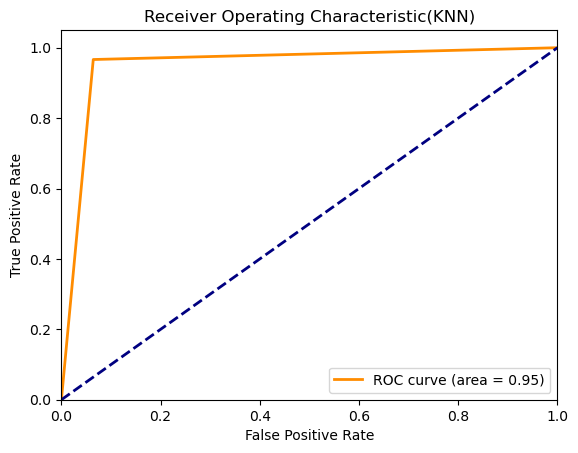

In [95]:
# Plotting the ROC curve with the FPR and TPR values
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC curve (area = {auc_knn:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(KNN)')
plt.legend(loc="lower right")
plt.show()

### 5. Extreme Gradient Boosting (XGBoost)

In [96]:
# Optimize the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2]
}
model_xgb = xgb.XGBClassifier(enable_categorical=True, random_state=42)
# Set up the GridSearchCV to find the best combination of parameters
grid_search_xgb = GridSearchCV(estimator= model_xgb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_xgb.fit(x_train, y_train)

Fitting 5 folds for each of 5184 candidates, totalling 25920 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_weight': [1, 2, 3],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.6, 0.7, 0.8, 0.9]},
             verbose=2)

In [97]:
# Printing the best parameters and estimators
print(grid_search_xgb.best_params_) 
print(grid_search_xgb.best_estimator_)

{'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


In [98]:
# Print the classification report
y_pred_xgb = grid_search_xgb.predict(x_test) 
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       903
           1       0.94      0.96      0.95       925

    accuracy                           0.95      1828
   macro avg       0.95      0.95      0.95      1828
weighted avg       0.95      0.95      0.95      1828



<Axes: >

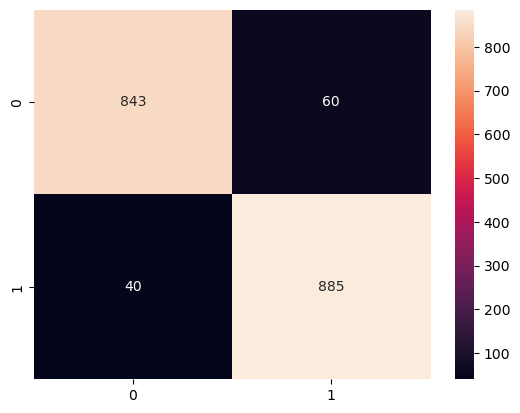

In [99]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(confusion_matrix_xgb,annot=True,fmt="d")

In [100]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred_xgb):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred_xgb)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [101]:
# Printing the performance evaluation
accuracy_xgb= accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
kappa_xgb = cohen_kappa_score(y_test, y_pred_xgb)
specificity_xgb = specificity_score(y_test, y_pred_xgb)
log_loss_xgb = log_loss(y_test, y_pred_xgb)
roc_auc_score_xgb = roc_auc_score(y_test, y_pred_xgb)

print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)
print("Kappa:", kappa_xgb)
print("Specificity:", specificity_xgb)
print("AUC:", roc_auc_score_xgb)
print("Log Loss:", log_loss_xgb) 

Accuracy: 0.9452954048140044
Precision: 0.9365079365079365
Recall: 0.9567567567567568
F1 Score: 0.946524064171123
Kappa: 0.8905461316919245
Specificity: 0.9335548172757475
AUC: 0.9451557870162521
Log Loss: 1.9717534676759931


In [102]:
# Calculating the False Positive Rate (FPR) and True Positive Rate (TPR) for the ROC curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb)
# Calculating the Area Under the Curve (AUC) for the ROC curve
auc_xgb = roc_auc_score(y_test, y_pred_xgb)

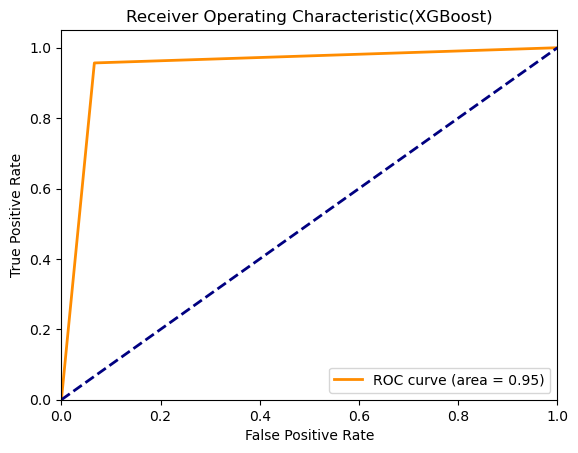

In [103]:
# Plotting the ROC curve with the FPR and TPR values
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'ROC curve (area = {auc_xgb:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(XGBoost)')
plt.legend(loc="lower right")
plt.show()

### 6. Categorical Boosting (CatBoost)

In [104]:
cat_features = ['V013', 'V024', 'V025', 'V106', 'V701', 'V201', 'V122', 'V159', 'V704', 'V190', 'V161', 'V404']
model_cb = CatBoostClassifier(random_state=42, verbose=False,cat_features = cat_features )
# Optimize the parameter grid for hyperparameter tuning
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 200, 300],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}
# Set up the GridSearchCV to find the best combination of parameters
grid_search_cb = GridSearchCV(estimator= model_cb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_cb.fit(x_train, y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000002588746FBF0>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8], 'iterations': [100, 200, 300],
                         'l2_leaf_reg': [1, 3, 5, 7, 9],
                         'learning_rate': [0.01, 0.05, 0.1]},
             verbose=2)

In [105]:
# Printing the best parameters and estimators
print(grid_search_cb.best_params_) 
print(grid_search_cb.best_estimator_)

{'depth': 8, 'iterations': 300, 'l2_leaf_reg': 3, 'learning_rate': 0.1}


In [106]:
# Print the classification report
y_pred_cb = grid_search_cb.predict(x_test) 
print(classification_report(y_test, y_pred_cb))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       903
           1       0.90      0.94      0.92       925

    accuracy                           0.92      1828
   macro avg       0.92      0.92      0.92      1828
weighted avg       0.92      0.92      0.92      1828



<Axes: >

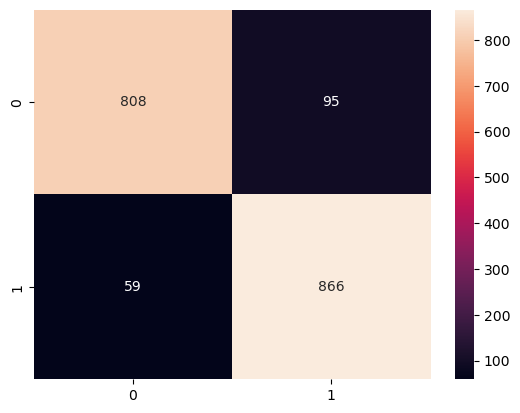

In [107]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix_cb = confusion_matrix(y_test, y_pred_cb)
sns.heatmap(confusion_matrix_cb,annot=True,fmt="d")

In [108]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred_cb):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred_cb)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [109]:
# Printing the performance evaluation
accuracy_cb = accuracy_score(y_test, y_pred_cb)
precision_cb = precision_score(y_test, y_pred_cb)
recall_cb = recall_score(y_test, y_pred_cb)
f1_cb = f1_score(y_test, y_pred_cb)
kappa_cb = cohen_kappa_score(y_test, y_pred_cb)
specificity_cb = specificity_score(y_test, y_pred_cb)
log_loss_cb = log_loss(y_test, y_pred_cb)
roc_auc_score_cb = roc_auc_score(y_test, y_pred_cb)

print("Accuracy:", accuracy_cb)
print("Precision:", precision_cb)
print("Recall:", recall_cb)
print("F1 Score:", f1_cb)
print("Kappa:", kappa_cb)
print("Specificity:", specificity_cb)
print("AUC:", roc_auc_score_cb)
print("Log Loss:", log_loss_cb) 

Accuracy: 0.9157549234135668
Precision: 0.9011446409989594
Recall: 0.9362162162162162
F1 Score: 0.9183457051961824
Kappa: 0.8314055090617922
Specificity: 0.8947951273532669
AUC: 0.9155056717847415
Log Loss: 3.0365003402210293


In [110]:
# Calculating the False Positive Rate (FPR) and True Positive Rate (TPR) for the ROC curve
fpr_cb, tpr_cb, _ = roc_curve(y_test, y_pred_cb)
# Calculating the Area Under the Curve (AUC) for the ROC curve
auc_cb = roc_auc_score(y_test, y_pred_cb)

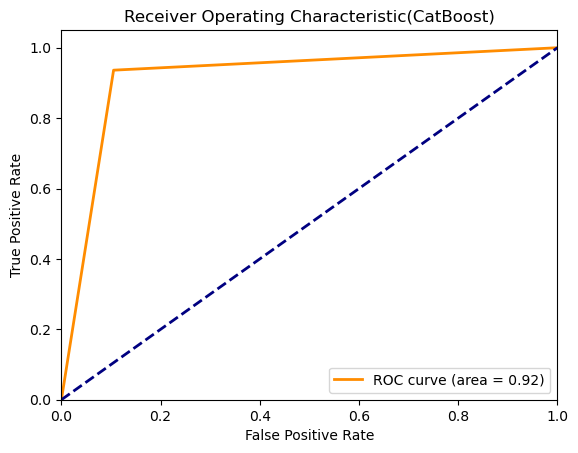

In [111]:
# Plotting the ROC curve with the FPR and TPR values
plt.figure()
plt.plot(fpr_cb, tpr_cb, color='darkorange', lw=2, label=f'ROC curve (area = {auc_cb:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(CatBoost)')
plt.legend(loc="lower right")
plt.show()

### 7. Multi-Layer Perceptron (MLP)

In [112]:
# Optimize the parameter grid for hyperparameter tuning
param_grid= {
   'hidden_layer_sizes': [(50,), (50,50), (100,),(100,50)],
    'activation': ['tanh', 'relu','logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001,0.001,.01, 0.05],
    'learning_rate': ['constant','adaptive','invscaling'],
}
model_mlp=MLPClassifier(random_state=42)
# Set up the GridSearchCV to find the best combination of parameters
grid_search_mlp= GridSearchCV( estimator= model_mlp, param_grid=param_grid, cv = 5, n_jobs=-1, verbose=2)
grid_search_mlp.fit(x_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu', 'logistic'],
                         'alpha': [0.0001, 0.001, 0.01, 0.05],
                         'hidden_layer_sizes': [(50,), (50, 50), (100,),
                                                (100, 50)],
                         'learning_rate': ['constant', 'adaptive',
                                           'invscaling'],
                         'solver': ['sgd', 'adam']},
             verbose=2)

In [113]:
# Printing the best parameters and estimators
print(grid_search_mlp.best_params_) 
print(grid_search_mlp.best_estimator_)

{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42)


In [114]:
# Print the classification report
y_pred_mlp = grid_search_mlp.predict(x_test) 
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       903
           1       0.87      0.88      0.88       925

    accuracy                           0.87      1828
   macro avg       0.87      0.87      0.87      1828
weighted avg       0.87      0.87      0.87      1828



<Axes: >

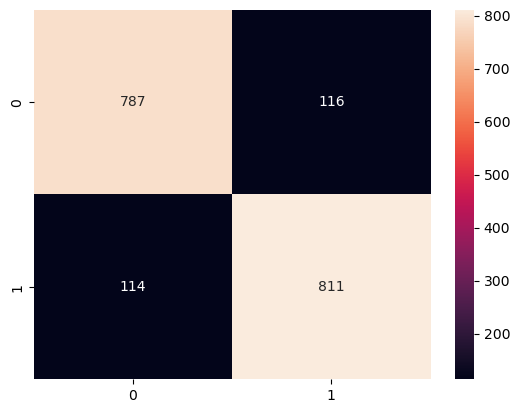

In [115]:
# Calculating and Visualizing the confusion matrix using heatmap
confusion_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(confusion_matrix_mlp,annot=True,fmt="d")

In [116]:
from sklearn.metrics import confusion_matrix
# Define a function to calculate the specificity score
def specificity_score(y_test, y_pred_mlp):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred_mlp)
    tn = cm[0, 0] 
    fp = cm[0, 1]
    return tn / (tn + fp)

In [117]:
# Printing the performance evaluation
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)
kappa_mlp = cohen_kappa_score(y_test, y_pred_mlp)
specificity_mlp = specificity_score(y_test, y_pred_mlp)
log_loss_mlp = log_loss(y_test, y_pred_mlp)
roc_auc_score_mlp = roc_auc_score(y_test, y_pred_mlp)

print("Accuracy:", accuracy_mlp)
print("Precision:", precision_mlp)
print("Recall:", recall_mlp)
print("F1 Score:", f1_mlp)
print("Kappa:", kappa_mlp)
print("Specificity:", specificity_mlp)
print("AUC:", roc_auc_score_mlp)
print("Log Loss:", log_loss_mlp) 

Accuracy: 0.8741794310722101
Precision: 0.8748651564185544
Recall: 0.8767567567567568
F1 Score: 0.8758099352051836
Kappa: 0.7483157797697224
Specificity: 0.8715393133997785
AUC: 0.8741480350782677
Log Loss: 4.535032975654784


In [118]:
# Calculating the False Positive Rate (FPR) and True Positive Rate (TPR) for the ROC curve
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_mlp)
# Calculating the Area Under the Curve (AUC) for the ROC curve
auc_mlp = roc_auc_score(y_test, y_pred_mlp)

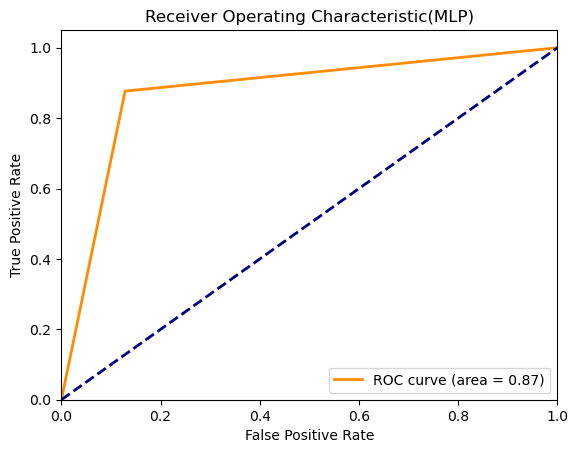

In [119]:
# Plotting the ROC curve with the FPR and TPR values
plt.figure()
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label=f'ROC curve (area = {auc_mlp:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(MLP)')
plt.legend(loc="lower right")
plt.show()

## Combined ROC Curve

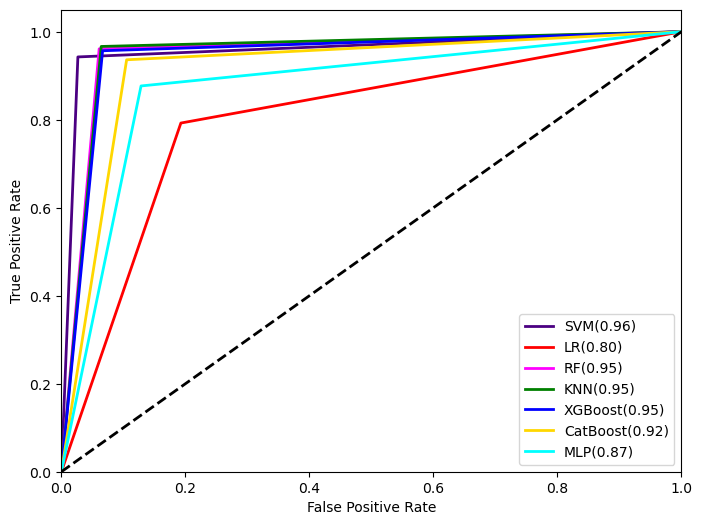

In [120]:
# Plotting ROC curves for multiple algorithms
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='indigo', lw=2, label=f'SVM({auc_svm:0.2f})')
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, label=f'LR({auc_lr:0.2f})')
plt.plot(fpr_rf, tpr_rf, color='magenta', lw=2, label=f'RF({auc_rf:0.2f})')
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label=f'KNN({auc_knn:0.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label=f'XGBoost({auc_xgb:0.2f})')
plt.plot(fpr_cb, tpr_cb, color='gold', lw=2, label=f'CatBoost({auc_cb:0.2f})')
plt.plot(fpr_mlp, tpr_mlp, color='cyan', lw=2, label=f'MLP({auc_mlp:0.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()